# Benchmark ComBind

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rmsds = {}
with open('../combind_sherlock/bpp_outputs/scores23/rmsds.csv') as fp:
    for line in fp:
        protein, ligand, best, glide, combind = line.strip().split(',')
        best, glide, combind = float(best), float(glide), float(combind)
        #if best > 2: continue
        if protein not in rmsds: rmsds[protein] = {}
        assert ligand not in rmsds[protein]
        rmsds[protein][ligand] = (best, glide, combind)

Ttest_relResult(statistic=3.3097129593716543, pvalue=0.0010076451900687727)
Glide Average: 3.93874123879 0.464052287582
ComBind Average: 3.70289511335 0.492374727669


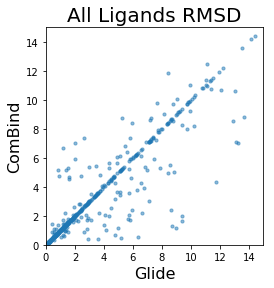

In [3]:
from scipy.stats import ttest_rel
x, y = [], []
for prot, ligs in rmsds.items():
    for lig, (best, glide, combind) in ligs.items():
        x += [glide]
        y += [combind]
print ttest_rel(x, y)
f, ax = plt.subplots()
plt.scatter(x, y, alpha = 0.5, s = 10)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('All Ligands RMSD', fontsize = 20)
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.xticks(range(0, 15, 2), range(0, 15, 2))
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x)), sum(np.array(x) <= 2.0) /  float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

In [4]:
x, y = np.array(x), np.array(y)

In [5]:
tol = .1
sum((y - x) > tol), sum((y - x) < -tol), sum(((y-x)<tol)*((y - x)>-tol))

(59, 80, 320)

P00489 3EBO_lig
Q16539 3IW5_lig
Q16539 3HUB_lig
Q16539 1YQJ_lig
Q16539 3HLL_lig
Q16539 3HUC_lig
ERA 2AYR_lig
P56817 3I25_lig
MEK1 3ZLS_lig
MEK1 3ZLW_lig
JAK2 3UGC_lig
GCR 3K23_lig
GCR 3BQD_lig
GCR 3K22_lig
P24941 3PXF_lig
SMO 4O9R_lig
SMO 4N4W_lig
CDK2 1FIN_lig
BRAF 4E26_lig
Glide Average: 3.93874123879
ComBind Average: 2.29763881904 0.684095860566


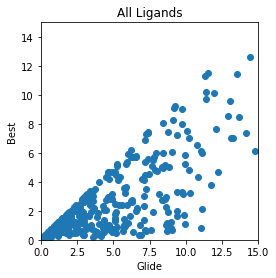

In [6]:
x, y = [], []
for prot, ligs in rmsds.items():
    for lig, (best, glide, combind) in ligs.items():
        if best > 8:
            print prot, lig
        x += [glide]
        y += [best]
f, ax = plt.subplots()
plt.scatter(x, y)
plt.xlabel('Glide')
plt.ylabel('Best')
plt.title('All Ligands')
plt.xlim(0, 15)
plt.ylim(0, 15)
ax.set_aspect('equal', 'box')
print 'Glide Average:', sum(x) / float(len(x))
print 'ComBind Average:', sum(y) / float(len(y)), sum(np.array(y) <= 2.0) /  float(len(y))

In [7]:
# for prot, ligs in rmsds.items():
#     x, y = [], []
#     for lig, (best, glide, combind) in ligs.items():
#         x += [glide]
#         y += [combind]
#     f, ax = plt.subplots()
#     plt.scatter(x, y)
#     plt.xlabel('Glide')
#     plt.ylabel('ComBind')
#     plt.xlim(0, 15)
#     plt.ylim(0, 15)
#     ax.set_aspect('equal', 'box')
#     plt.title(prot)
#     plt.show()

3.7255154122 3.51710346598


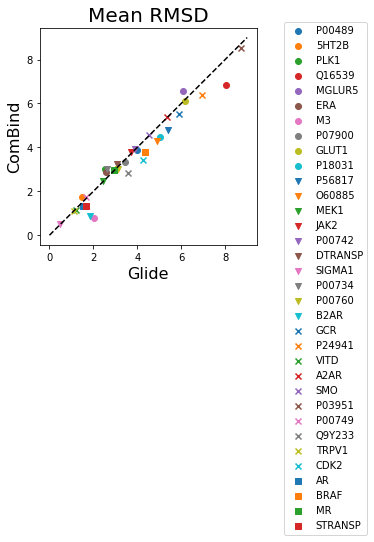

In [8]:
x, y, label = [], [], []
for prot, ligs in rmsds.items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide]
        _y += [combind]
    label += [prot]
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.title('Mean RMSD', fontsize = 20)
#plt.xlim(0, 5)
#plt.ylim(0, 5)
plt.plot(range(10), linestyle='--', c = 'k')
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

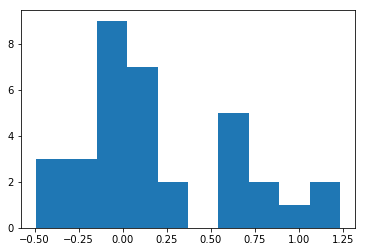

In [9]:
plt.hist(np.array(x) - np.array(y))
plt.show()

P00489 20
5HT2B 2
PLK1 12
Q16539 16
MGLUR5 5
ERA 18
M3 2
P07900 17
GLUT1 3
P18031 20
P56817 19
O60885 17
MEK1 20
JAK2 20
P00742 14
DTRANSP 9
SIGMA1 2
P00734 16
P00760 20
B2AR 8
GCR 18
P24941 18
VITD 20
A2AR 18
SMO 7
P03951 9
P00749 20
Q9Y233 20
TRPV1 2
CDK2 19
AR 11
BRAF 19
MR 13
STRANSP 5
0.39212576538 0.414131575162


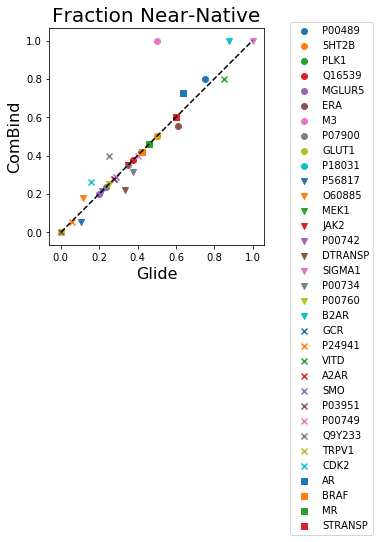

In [10]:
x, y = [], []
for prot, ligs in rmsds.items():
    _x, _y = [], []
    for lig, (best, glide, combind) in ligs.items():
        _x += [glide <= 1.5]
        _y += [combind <= 1.5]
    label += [prot]
    print prot, len(_x)
    x += [sum(_x)/float(len(_x))]
    y += [sum(_y)/float(len(_y))]
    
markers = ['o', 'v', 'x', 's']
f, ax = plt.subplots()
for i, (_x, _y, _label) in enumerate(zip(x, y, label)):
    plt.scatter(_x, _y, marker = markers[i/10], label = _label)
plt.xlabel('Glide', fontsize = 16)
plt.ylabel('ComBind', fontsize = 16)
plt.plot(range(2), linestyle='--', c = 'k')
plt.title('Fraction Near-Native', fontsize = 20)
ax.set_aspect('equal', 'box')
print sum(x) / float(len(x)), sum(y) / float(len(y))
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.show()

(array([  1.,   0.,   0.,   0.,   0.,   1.,   3.,   2.,  23.,   4.]),
 array([-0.5       , -0.43888889, -0.37777778, -0.31666667, -0.25555556,
        -0.19444444, -0.13333333, -0.07222222, -0.01111111,  0.05      ,
         0.11111111]),
 <a list of 10 Patch objects>)

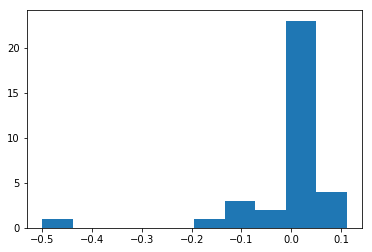

In [11]:
plt.hist(np.array(x) - np.array(y))